# Importing libraries:

In [108]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading 'kc_house_data.csv' file for Regression:
- The dataset contains house sales pricing details for King County between May'14 and May'15 
- Dataset link: https://www.kaggle.com/shivachandel/kc-house-data

In [109]:
kc_df = pd.read_csv("kc_house_data.csv")
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,no,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,no,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,NaN,no,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,no,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,no,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Dictionary:
- Data Dictionary: https://moderndive.github.io/moderndive/reference/house_prices.html#format
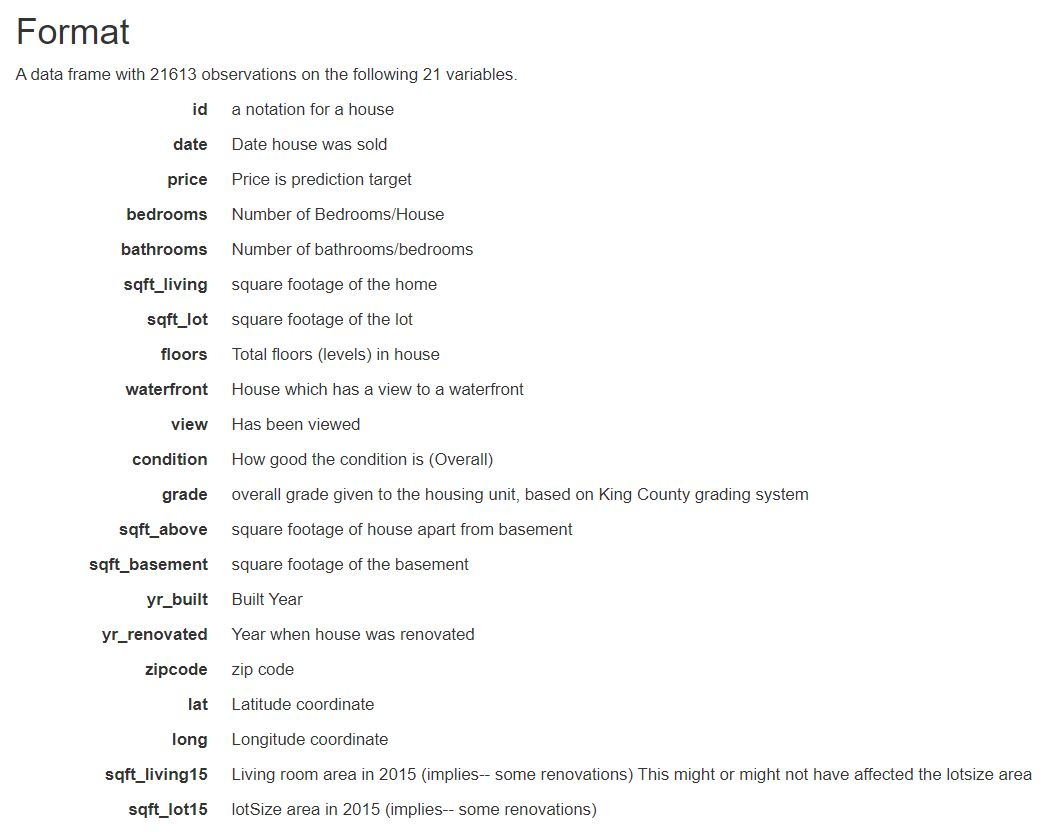

# Target variable: price
### Variables relevant to the prediction forming the Features set are: bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15 and sqft_lot15

In [110]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            20308 non-null float64
bedrooms         21613 non-null int64
bathrooms        19386 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           20303 non-null float64
waterfront       20338 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              19511 non-null float64
long             19458 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13), object(3)
memory usage: 3.5+ MB


# Exploratory Data Analysis:

In [111]:
# getting the statictical description of the dataset
kc_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.030800e+04,21613.000000,19386.000000,21613.000000,2.161300e+04,20303.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,19511.000000,19458.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400399e+05,3.370842,2.113858,2079.899736,1.510697e+04,1.494237,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.559764,-122.213708,1986.552492,12768.455652
std,2.876566e+09,3.675166e+05,0.930062,0.769753,918.440897,4.142051e+04,0.539373,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138561,0.140954,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677750,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


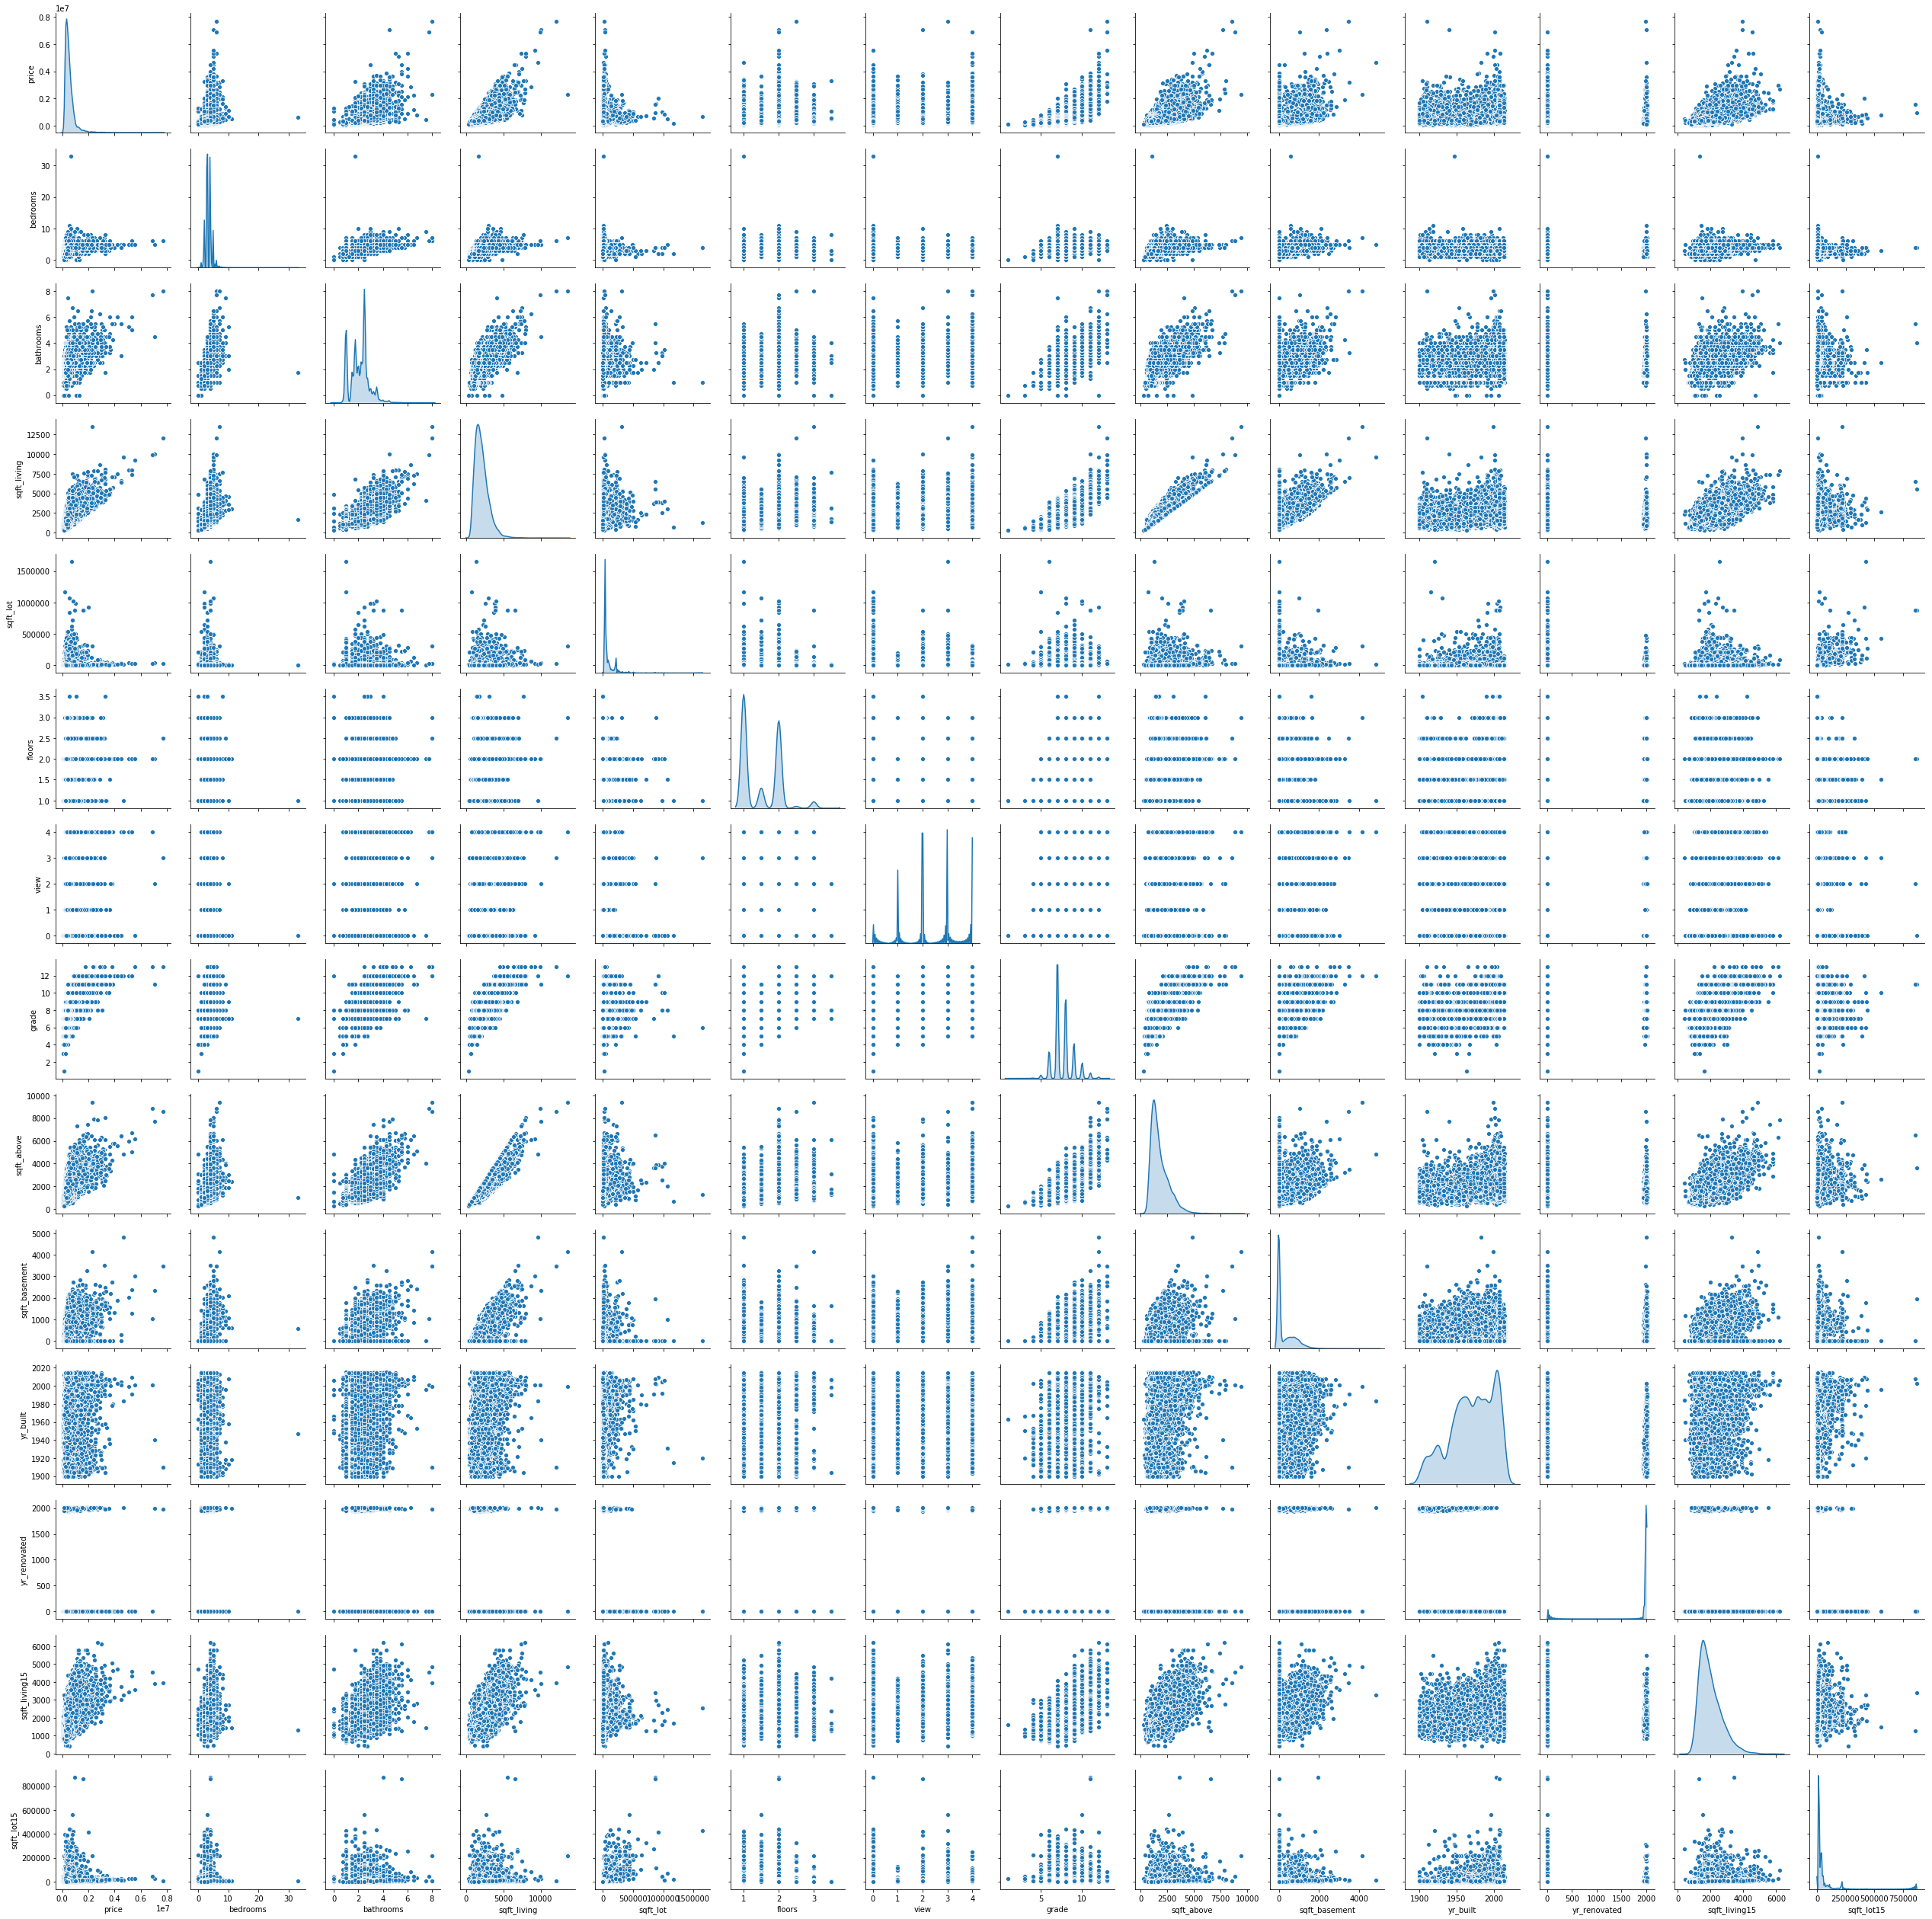

In [112]:
# We plot scatterplots for all variables, for outlier detection, if any

%matplotlib inline
import seaborn as sns
#import matplotlib.pyplot as plt
data = pd.read_csv("kc_house_data.csv")
sns.pairplot(data, kind="scatter", diag_kind="kde", vars=["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","view","grade","sqft_above","sqft_basement","yr_built","yr_renovated","sqft_living15","sqft_lot15"])
plt.show()

# Data Preprocessing:

In [113]:
# dropping 'id','date','zipcode','lat' and 'long' columns as they are insignificant for this regression problem:
kc_df = kc_df.drop(columns=['id','date','zipcode','lat','long'])
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            20308 non-null float64
bedrooms         21613 non-null int64
bathrooms        19386 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           20303 non-null float64
waterfront       20338 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(11), object(2)
memory usage: 2.6+ MB


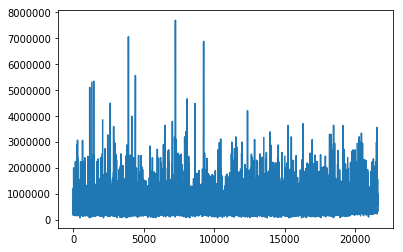

In [114]:
# price column has null values
# so we want to plot the data to know if it is skewed or not
plt.plot(kc_df['price'])

In [115]:
# since the data is not skewed, we can use the arithmetic mean of price for imputation
print('Mean Price:', kc_df['price'].mean())
kc_df['price'] = kc_df['price'].fillna(float("{0:.0f}".format(kc_df['price'].mean())))
kc_df.info()

Mean Price: 540039.8995469766
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        19386 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           20303 non-null float64
waterfront       20338 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(11), object(2)
memory usage: 2.6+ MB


In [116]:
kc_df['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

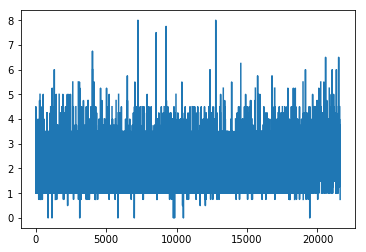

In [117]:
# bathroom column has null values
# so we want to plot the values to know if the data is skewed or not
plt.plot(kc_df['bathrooms'])

In [118]:
# since the data is not skewed, we can use the arithmetic mean of number of bathrooms for imputation
print('Mean Bathrooms per house:', kc_df['bathrooms'].mean())
kc_df['bathrooms'] = kc_df['bathrooms'].fillna(float("{0:.2f}".format(kc_df['bathrooms'].mean())))
kc_df.info()

Mean Bathrooms per house: 2.113857938718663
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           20303 non-null float64
waterfront       20338 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(11), object(2)
memory usage: 2.6+ MB


In [119]:
kc_df['bathrooms'].head()

0    1.00
1    2.25
2    1.00
3    3.00
4    2.00
Name: bathrooms, dtype: float64

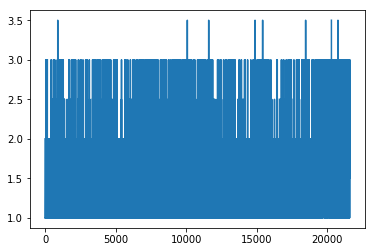

In [120]:
# floors column has null values
# so we want to plot the values to know if the data is skewed or not
plt.plot(kc_df['floors'])

In [121]:
# since the data is not skewed, we can use the arithmetic mean of number of floors for imputation
print('Mean floor levels in a house:', kc_df['floors'].mean())
kc_df['floors'] = kc_df['floors'].fillna(float("{0:.1f}".format(kc_df['floors'].mean())))
kc_df.info()

Mean floor levels in a house: 1.4942373048317983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       20338 non-null object
view             21613 non-null int64
condition        21613 non-null object
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(11), object(2)
memory usage: 2.6+ MB


In [122]:
kc_df['floors'].head()

0    1.0
1    2.0
2    1.5
3    1.0
4    1.0
Name: floors, dtype: float64

In [123]:
# waterfront has missing values
# we find out how many to conclude if we can drop those instances
print(kc_df['waterfront'].isnull().sum())

1275


In [124]:
# because only 1275 rows out of 21613 are null, we can afford to drop these rows without much data loss as follows:
kc_df = kc_df.dropna(subset=['waterfront'])
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20338 entries, 0 to 21611
Data columns (total 16 columns):
price            20338 non-null float64
bedrooms         20338 non-null int64
bathrooms        20338 non-null float64
sqft_living      20338 non-null int64
sqft_lot         20338 non-null int64
floors           20338 non-null float64
waterfront       20338 non-null object
view             20338 non-null int64
condition        20338 non-null object
grade            20338 non-null int64
sqft_above       20338 non-null int64
sqft_basement    20338 non-null int64
yr_built         20338 non-null int64
yr_renovated     20338 non-null int64
sqft_living15    20338 non-null int64
sqft_lot15       20338 non-null int64
dtypes: float64(3), int64(11), object(2)
memory usage: 2.6+ MB


In [125]:
# waterfront is a cateforical variable with yes/no values. We can map yes: 1 and no: 0 as follows:
kc_df['waterfront'] = kc_df['waterfront'].map({'yes': 1, 'no': 0}).astype(int)
kc_df['waterfront'].head()

0    0
1    0
2    0
3    0
4    0
Name: waterfront, dtype: int32

In [126]:
# condition is an ordinal variable with ratings from poor (1), fair (2), average (3), good (4) and very good (5). We can map them as follows:
kc_df['condition'] = kc_df['condition'].map({'poor': 1, 'fair': 2, 'average': 3, 'good': 4, 'very_good': 5}).astype(int)
kc_df['condition'].head()

0    3
1    3
2    3
3    5
4    3
Name: condition, dtype: int32

In [127]:
# Just an end check, there are no null values anymore
kc_df.isna().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [128]:
kc_df.to_csv("kc_house_data_cleaned.csv")

# Data Leakage

[Text(0.5, 0, 'price'),
 Text(1.5, 0, 'bedrooms'),
 Text(2.5, 0, 'bathrooms'),
 Text(3.5, 0, 'sqft_living'),
 Text(4.5, 0, 'sqft_lot'),
 Text(5.5, 0, 'floors'),
 Text(6.5, 0, 'waterfront'),
 Text(7.5, 0, 'view'),
 Text(8.5, 0, 'condition'),
 Text(9.5, 0, 'grade'),
 Text(10.5, 0, 'sqft_above'),
 Text(11.5, 0, 'sqft_basement'),
 Text(12.5, 0, 'yr_built'),
 Text(13.5, 0, 'yr_renovated'),
 Text(14.5, 0, 'sqft_living15'),
 Text(15.5, 0, 'sqft_lot15')]

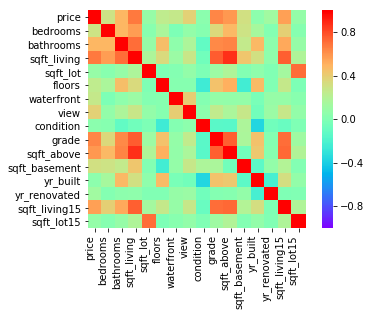

In [129]:
# we plot a correlation matrix to identify which variables affect our prediction the most
corr = kc_df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='rainbow', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

As per the correlation matrix, we don't see any strong positive or negative correlations.

# Train-Test split and Scaling:

In [130]:
# we select a random sample to perform all regression tasks.
kc_df = kc_df.sample(frac = 0.20)
X = kc_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']].as_matrix()
y = kc_df['price']

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_train

array([[0.22222222, 0.17857143, 0.12618297, ..., 0.        , 0.18019802,
        0.01603316],
       [0.55555556, 0.17857143, 0.23869611, ..., 0.        , 0.17821782,
        0.00492144],
       [0.33333333, 0.19428571, 0.24500526, ..., 0.        , 0.16831683,
        0.03177243],
       ...,
       [0.44444444, 0.17857143, 0.14511041, ..., 0.        , 0.27920792,
        0.01401444],
       [0.22222222, 0.25      , 0.11566772, ..., 0.        , 0.15643564,
        0.00077204],
       [0.11111111, 0.14285714, 0.10410095, ..., 0.        , 0.1960396 ,
        0.00618912]])

# Takeaways from Project 1:

- We had seen earlier after Project 1 that the price of the houses increase with increase in number of bedrooms, number of bathrooms, amount of square feet and the year when it was built.
- This is exemplified below:

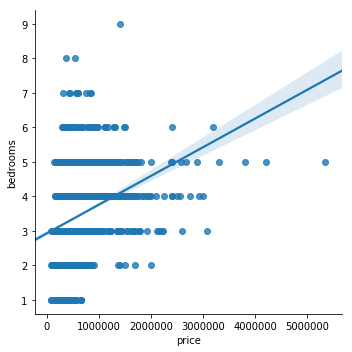

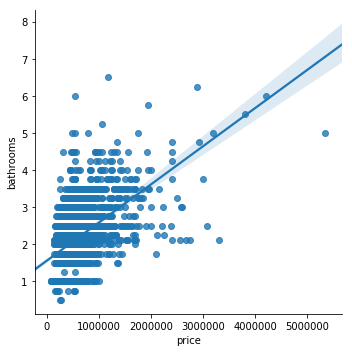

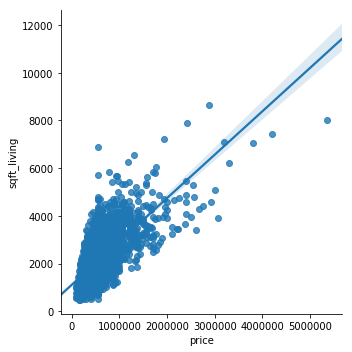

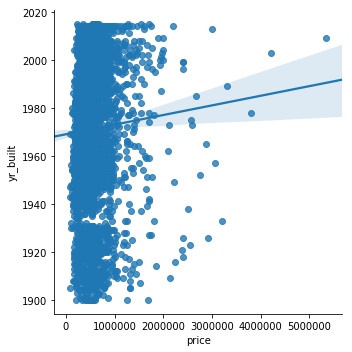

In [25]:
sns.lmplot(x='price', y='bedrooms', data=kc_df)
sns.lmplot(x='price', y='bathrooms', data=kc_df)
sns.lmplot(x='price', y='sqft_living', data=kc_df)
sns.lmplot(x='price', y='yr_built', data=kc_df)

# NOTE: 
All values of the squared-errors for the models run below are inflated by a power of 10, and precision of only 2 decimal points

# Bagging Linear Regression:

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

lreg = LinearRegression()
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]

param_grid = dict(n_estimators = n_estimators_vals, max_samples = max_samples_vals)

lreg_bag = BaggingRegressor(lreg, bootstrap = False, random_state = 0)

grid_search = GridSearchCV(lreg_bag, param_grid = dict(n_estimators = n_estimators_vals, max_samples = max_samples_vals), cv = 10, return_train_score = True)
grid_search.fit(X_train, y_train)
print("Best score on validation set: {:.2f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.60
Best parameters: {'max_samples': 170, 'n_estimators': 500}
Best cross-validation score: 0.60


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train score: 0.5977
Test score: 0.5651
Mean absolute error (MAE): 137467.1868557407
Mean square error (MSE): 41192746720.89844
Root mean square error (RMSE): 202959.96334474056


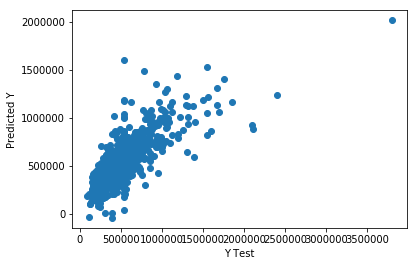

In [27]:
lreg_bag = BaggingRegressor(lreg, n_estimators = 100, max_samples = 50, bootstrap = False, random_state = 0)
lreg_bag.fit(X_train, y_train)
print(lreg)
print('Train score: %.4f'%lreg_bag.score(X_train, y_train))
print('Test score: %.4f'%lreg_bag.score(X_test, y_test))

predictions = lreg_bag.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics
# calculate these metrics by hand!
print('Mean absolute error (MAE):', metrics.mean_absolute_error(y_test, predictions))
print('Mean square error (MSE):', metrics.mean_squared_error(y_test, predictions))
print('Root mean square error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Bagging Ridge:

In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.6112
Test score: 0.5527


In [29]:
ridge_reg = Ridge(alpha = 0.001)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]

param_grid = dict(n_estimators = n_estimators_vals, max_samples = max_samples_vals)

rid_bag = BaggingRegressor(ridge_reg, bootstrap = True, random_state = 0)

grid_search = GridSearchCV(rid_bag, param_grid = dict(n_estimators = n_estimators_vals, max_samples = max_samples_vals), cv = 10, return_train_score = True)
grid_search.fit(X_train, y_train)
print("Best score on validation set: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.56
Best parameters: {'max_samples': 150, 'n_estimators': 400}
Best cross-validation score: 0.60


In [30]:
ridge_reg = Ridge(alpha = 0.001)

from sklearn.ensemble import BaggingRegressor
bag_reg =  BaggingRegressor(ridge_reg, n_estimators=200, max_samples=50, bootstrap=True, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [31]:
bag_reg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.60
Test score: 0.56


In [32]:
# metric calculation
from sklearn import  metrics

ridge_tr_pred = bag_reg.predict(X_train)
ridge_test_pred = bag_reg.predict(X_test)
ridge_tr_mse = metrics.mean_squared_error(y_train, ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('Train MSE: ', ridge_tr_mse)
print('Train RMSE: ', ridge_tr_rmse)

print('Test MSE: ', ridge_test_mse)
print('Test RMSE: ', ridge_test_rmse)

Train MSE:  45597791635.29566
Train RMSE:  213536.39417039818
Test MSE:  41365353116.255775
Test RMSE:  203384.74160136934


# Bagging LASSO:

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train, y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.6112
Test score: 0.5527


C:\Users\heta2\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [34]:
import warnings
warnings.filterwarnings('ignore')

lasso_reg = Lasso(alpha = 0.001)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]

param_grid = dict(n_estimators=n_estimators_vals, max_samples=max_samples_vals)

lass_bag = BaggingRegressor(lasso_reg, bootstrap = True, random_state=0)

grid_search = GridSearchCV(lass_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples=max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best score on validation set: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.56
Best parameters: {'max_samples': 150, 'n_estimators': 400}
Best cross-validation score: 0.60


In [35]:
import warnings
warnings.filterwarnings('ignore')

lasso_reg = Lasso(alpha = 0.001)
bag_reg = BaggingRegressor(lasso_reg, n_estimators=200, max_samples=50, bootstrap=True, random_state=0)

bag_reg.fit(X_train, y_train)

BaggingRegressor(base_estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=50, n_estimators=200, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [36]:
import warnings
warnings.filterwarnings('ignore')

bag_reg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.59
Test score: 0.55


In [37]:
import warnings
warnings.filterwarnings('ignore')

# metric calculation:
from sklearn import metrics

lasso_tr_pred = bag_reg.predict(X_train)
lasso_test_pred = bag_reg.predict(X_test)
lasso_tr_mse = metrics.mean_squared_error(y_train, lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('Train MSE: ', lasso_tr_mse)
print('Train RMSE: ', lasso_tr_rmse)

print('Test MSE: ', lasso_test_mse)
print('Test RMSE: ', lasso_test_rmse)

Train MSE:  47091911388.636696
Train RMSE:  217006.7081650627
Test MSE:  42494299130.087845
Test RMSE:  206141.4541767081


# Pasting Linear Regression:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train score: 0.6112
Test score: 0.5526
Coefficients: 
 [-2.68623140e+05  1.56825747e+05 -1.11205591e+18  9.78471646e+04
  1.09454068e+05  3.75032064e+05  1.53496940e+05  1.04203446e+05
  9.48163887e+05  1.00491881e+18  3.68877081e+17 -3.78894222e+05
  4.64020629e+04  1.23711722e+05 -2.09542453e+05]
MAE: 138425.9488816637
MSE: 42380972240.534454
RMSE: 205866.3941505132


,Coefficient
0,-2.686231e+05
1,1.568257e+05
2,-1.112056e+18
3,9.784716e+04
4,1.094541e+05
5,3.750321e+05
6,1.534969e+05
7,1.042034e+05
8,9.481639e+05
9,1.004919e+18


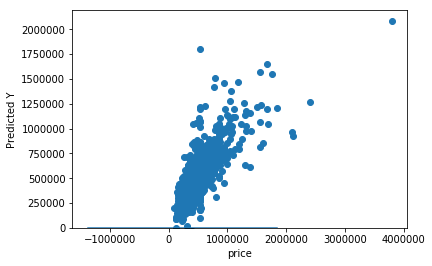

In [38]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg)
print('Train score: %.4f'%lreg.score(X_train, y_train))
print('Test score: %.4f'%lreg.score(X_test, y_test))

# The coefficients
print('Coefficients: \n', lreg.coef_)
predictions = lreg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# metrics calculation
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
sns.distplot((y_test-predictions), bins=500)
coefficients = pd.DataFrame(lreg.coef_, X.dtype.names)
coefficients.columns = ['Coefficient']
coefficients

# Pasting KNN:

In [39]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_train, y_train)
train_score_array.append(knn_reg.score(X_train, y_train))
test_score_array.append(knn_reg.score(X_test, y_test))
print('Train score: ', train_score_array)
print('Test score: ', test_score_array)

Train score:  [0.7499241113222075]
Test score:  [0.4641592496448041]


In [40]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

knn_tr_pred = knn_reg.predict(X_train)
knn_test_pred = knn_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_train, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('Train MSE: ', knn_tr_mse)
print('Train RMSE: ', knn_tr_rmse)

print('Test MSE: ', knn_test_mse)
print('Test RMSE: ', knn_test_rmse)

print('Train score: ', knn_reg.score(X_train, y_train))
print('Test score: ', knn_reg.score(X_test, y_test) )

Train MSE:  28462445060.8459
Train RMSE:  168708.16536506437
Test MSE:  50759084015.003685
Test RMSE:  225297.7674434518
Train score:  0.7499241113222075
Test score:  0.4641592496448041


In [41]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

knn_reg = KNeighborsRegressor(3)
n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]

param_grid = dict(n_estimators = n_estimators_vals, max_samples = max_samples_vals)

knn_bag = BaggingRegressor(knn_reg, bootstrap = False, random_state=0)

grid_search = GridSearchCV(knn_bag, param_grid = dict(n_estimators=n_estimators_vals, max_samples=max_samples_vals), cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best score on test set: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on test set: 0.50
Best parameters: {'max_samples': 200, 'n_estimators': 200}
Best cross-validation score: 0.50


In [42]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(3)
bag_reg =  BaggingRegressor(knn_reg, n_estimators=200, max_samples=150, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [43]:
bag_reg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.49
Test score: 0.49


In [44]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

knn_tr_pred = bag_reg.predict(X_train)
knn_test_pred = bag_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_train, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('Train MSE: ', knn_tr_mse)
print('Train RMSE: ', knn_tr_rmse)
print('Test MSE: ', knn_test_mse)
print('Test RMSE: ', knn_test_rmse)

Train MSE:  58177688369.58562
Train RMSE:  241200.51486177556
Test MSE:  48555785214.637634
Test RMSE:  220353.77286227173


# Ada Boosting - SVM(kernel='linear') and SVM(kernel='rbf'):

In [45]:
from sklearn import svm
from sklearn.svm import SVR
import numpy as np

In [46]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import svm

svm_r = svm.SVR(kernel='linear', C=100)
svm_r.fit(X_train, y_train)

svmr_tr_pred = svm_r.predict(X_train)
svmr_test_pred = svm_r.predict(X_test)
print('Train score:',svm_r.score(X_train, y_train))      
print('Test score:',svm_r.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn import metrics

svm_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('Train MSE: ', svm_tr_mse)
print('Train RMSE: ', svm_tr_rmse)

print('Test MSE: ', svm_test_mse)
print('Test RMSE: ', svm_test_rmse)
print('Train score:',svm_r.score(X_train, y_train))      
print('Test score:',svm_r.score(X_test, y_test))

Train score: 0.018999396883890296
Test score: 0.029930589112045825
Train MSE:  111652810346.79968
Train RMSE:  334144.89424020785
Test MSE:  91892665302.15721
Test RMSE:  303138.0301152549
Train score: 0.018999396883890296
Test score: 0.029930589112045825


In [48]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostRegressor

svm_r = svm.SVR(kernel='linear', C=100)

n_estimators_vals = [100, 200, 300, 400, 500]
learning_rate_vals = [0.01, 0.1, 0.3, 0.5, 1.0]

param_grid = dict(n_estimators=n_estimators_vals, learning_rate=learning_rate_vals)
svm_r_bag = AdaBoostRegressor(svm_r, random_state=0)
grid_search = GridSearchCV(svm_r_bag, param_grid = dict(n_estimators=n_estimators_vals, learning_rate=learning_rate_vals), cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best score on test set: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on test set: 0.07
Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Best cross-validation score: 0.06


In [49]:
svm_r = svm.SVR(kernel='linear', C=100)
ada_reg =  AdaBoostRegressor(svm_r, n_estimators=100, learning_rate=0.01, random_state=0)

ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)

In [50]:
ada_reg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.03
Test score: 0.04


In [51]:
svmr_tr_pred = ada_reg.predict(X_train)
svmr_test_pred = ada_reg.predict(X_test)
print('Train score:',ada_reg.score(X_train, y_train))      
print('Test score:',ada_reg.score(X_test, y_test))

svm_tr_mse = metrics.mean_squared_error(y_train, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('Train MSE: ', svm_tr_mse)
print('Train RMSE: ', svm_tr_rmse)
print('Test MSE: ', svm_test_mse)
print('Test RMSE: ', svm_test_rmse)
print('Train score:',ada_reg.score(X_train, y_train))      
print('Test score:',ada_reg.score(X_test, y_test))

Train score: 0.03158223207009336
Test score: 0.04225496595351719
Train MSE:  110220692052.26701
Train RMSE:  331995.0181136262
Test MSE:  90725202620.16795
Test RMSE:  301206.2459846541
Train score: 0.03158223207009336
Test score: 0.04225496595351719


In [52]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostRegressor

svm_r = svm.SVR(kernel='rbf', C=100, gamma=0.1)

n_estimators_vals = [100, 200, 300, 400, 500]
learning_rate_vals = [0.01, 0.1, 0.3, 0.5, 1.0]

param_grid = dict(n_estimators=n_estimators_vals, learning_rate=learning_rate_vals)
svm_r_bag = AdaBoostRegressor(svm_r, random_state=0)
grid_search = GridSearchCV(svm_r_bag, parjam_grid = dict(n_estimators=n_estimators_vals, learning_rate=learning_rate_vals), cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best score on test set: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on test set: 0.01
Best parameters: {'learning_rate': 0.01, 'n_estimators': 500}
Best cross-validation score: 0.00


In [53]:
import warnings
warnings.filterwarnings('ignore')

svm_r = svm.SVR(kernel='rbf', C=100, gamma=0.1)
ada_reg_rbf = AdaBoostRegressor(svm_r, n_estimators=100, learning_rate=0.01, random_state=0)

ada_reg_rbf.fit(X_train, y_train)
y_pred = ada_reg_rbf.predict(X_test)

In [54]:
import warnings
warnings.filterwarnings('ignore')

ada_reg_rbf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.03
Test score: 0.04


# Gradient Boosting - Decision Tree:

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

dt = DecisionTreeRegressor()
max_depth_vals = [4,6,8,10]
param_grid = dict(max_depth = max_depth_vals)

gs_dt = GridSearchCV(dt, param_grid = dict(max_depth=max_depth_vals), return_train_score=True)

gs_dt
gs_dt.fit(X_train, y_train)
print("Best parameters: {}".format(gs_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(gs_dt.best_score_))

Best parameters: {'max_depth': 4}
Best cross-validation score: 0.49


In [56]:
from  sklearn.ensemble import GradientBoostingRegressor

dt_r = DecisionTreeRegressor(max_depth=8)
n_estimators_vals = [1,2,3,4,5]
learning_rate_vals = [0.01, 0.1, 0.3, 0.5, 1.0]

param_grid = dict(n_estimators=n_estimators_vals, learning_rate=learning_rate_vals)
gbrt = GradientBoostingRegressor(dt_r, random_state=0)
gs_dt_r = GridSearchCV(gbrt, param_grid = dict(n_estimators=n_estimators_vals, learning_rate=learning_rate_vals), cv=10, return_train_score=True)
gs_dt_r

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1,
             loss=DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, ...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.1, 0.3, 0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=8, n_estimators=100, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=8, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.313


# PCA:

In [59]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   Size of validation set: {}   Size of test set: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 2288   Size of validation set: 763   Size of test set: 1017



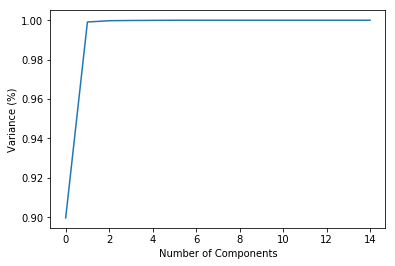

In [61]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.show()

In [62]:
pca = PCA(n_components=10)

X_trainval = pca.fit_transform(X_trainval)
X_test = pca.transform(X_test)

In [63]:
X_trainval.shape

(3051, 10)

In [64]:
X_test.shape

(1017, 10)

In [65]:
pca.explained_variance_

array([2.28937422e+09, 2.47062450e+08, 1.62786604e+06, 2.76622154e+05,
       1.54823738e+05, 1.35648020e+05, 6.43277031e+02, 6.10188072e-01,
       4.55481991e-01, 4.17126916e-01])

In [66]:
pca.n_components_

10

In [67]:
pca.explained_variance_ratio_

array([9.01814037e-01, 9.73210858e-02, 6.41237431e-04, 1.08965035e-04,
       6.09870676e-05, 5.34335046e-05, 2.53395120e-07, 2.40360952e-10,
       1.79420231e-10, 1.64311673e-10])

In [68]:
np.sum(pca.explained_variance_ratio_)

0.9999999997256688

# KNN after PCA:

Text(0, 0.5, 'MSE')

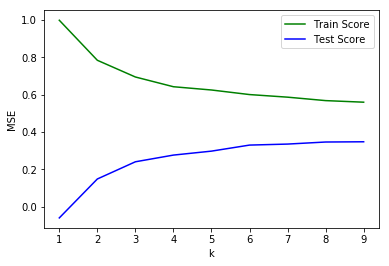

In [69]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1, 10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_trainval, y_trainval)
    train_score_array.append(knn_reg.score(X_trainval, y_trainval))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1, 10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [70]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1, 3, 5, 7, 9, 12, 15, 17, 20])
k_range = [1, 3, 5, 7, 9, 12, 15, 17, 20]
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights=weights_range)

grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best score on validation set: 0.00
Best parameters: {'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score: 0.41


In [71]:
%matplotlib inline
train_score_array = []
test_score_array = []

knn_reg = KNeighborsRegressor(12)
knn_reg.fit(X_trainval, y_trainval)
train_score_array.append(knn_reg.score(X_trainval, y_trainval))
test_score_array.append(knn_reg.score(X_test, y_test))
print('Train score: ', train_score_array)
print('Test score: ', test_score_array)

Train score:  [0.5251953033278833]
Test score:  [0.3569859584981404]


In [72]:
from sklearn import metrics

knn_tr_pred = knn_reg.predict(X_trainval)
knn_test_pred = knn_reg.predict(X_test)
knn_tr_mse = metrics.mean_squared_error(y_trainval, knn_tr_pred)
knn_tr_rmse = np.sqrt(knn_tr_mse)
knn_test_mse = metrics.mean_squared_error(y_test, knn_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)

print('Train MSE: ', knn_tr_mse)
print('Train RMSE: ', knn_tr_rmse)
print('Test MSE: ', knn_test_mse)
print('Test RMSE: ', knn_test_rmse)
print('Train score: ', knn_reg.score(X_trainval, y_trainval))
print('Test score: ', knn_reg.score(X_test, y_test) )

Train MSE:  54374052311.75207
Train RMSE:  233182.4442614668
Test MSE:  62006524829.429245
Test RMSE:  249011.09378786568
Train score:  0.5251953033278833
Test score:  0.3569859584981404


# Ridge:

In [73]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_trainval, y_trainval)
    train_score_list.append(ridge.score(X_trainval, y_trainval))
    test_score_list.append(ridge.score(X_test, y_test))

In [74]:
print('Train score: ', train_score_list)
print('Test score: ', test_score_list)

Train score:  [0.5930439117923958, 0.593043911490895, 0.5930438813772103, 0.5930409060411461, 0.5927760370968569]
Test score:  [0.5792980699348627, 0.5792980988619385, 0.5792983532020581, 0.579297449758804, 0.5789855692420616]


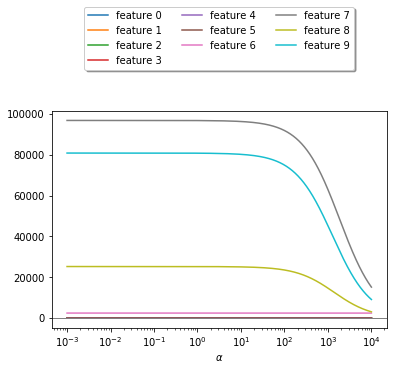

In [75]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1, 1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1, 1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_trainval, y_trainval)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0, 10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.show()

In [76]:
from sklearn.linear_model import Ridge
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridge =Ridge()
    scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}    

ridge = Ridge(**best_parameters)
ridge.fit(X_trainval, y_trainval)
test_score = ridge.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.58
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.58


In [77]:
from sklearn import  metrics

ridge_tr_pred = ridge.predict(X_trainval)
ridge_test_pred = ridge.predict(X_test)
ridge_tr_mse = metrics.mean_squared_error(y_trainval, ridge_tr_pred)
ridge_tr_rmse = np.sqrt(ridge_tr_mse)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = np.sqrt(ridge_test_mse)

print('Train MSE: ', ridge_tr_mse)
print('Train RMSE: ', ridge_tr_rmse)

print('Test MSE: ', ridge_test_mse)
print('Test RMSE: ', ridge_test_rmse)

Train MSE:  46604112772.5049
Train RMSE:  215879.85726441664
Test MSE:  40568732827.3264
Test RMSE:  201416.81366590626


# LASSO:

In [78]:
from sklearn.linear_model import Lasso

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_trainval, y_trainval)
    train_score_list.append(lasso.score(X_trainval, y_trainval))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

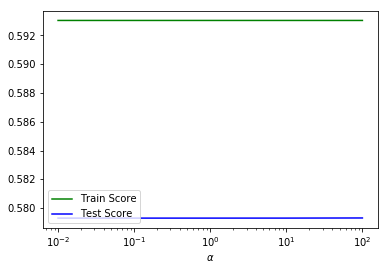

In [79]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

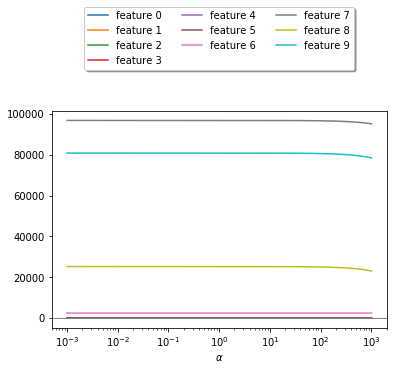

In [80]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1, 1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1, 1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_trainval, y_trainval)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0, 10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=3, fancybox=True, shadow=True)
plt.show()

In [81]:
from sklearn.linear_model import Lasso
import numpy as np

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:   
        lasso = Lasso()
        # perform cross-validation
        scores = cross_val_score(ridge, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'alpha': alpha}
            
# rebuild a model on the combined training and validation set
lasso = Lasso(**best_parameters)
lasso.fit(X_trainval, y_trainval)
test_score = lasso.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.58
Best parameters:  {'alpha': 0.001}
Test set score with best parameters: 0.58


In [82]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_trainval, y_trainval)
print('Train score: {:.4f}'.format(lasso.score(X_trainval, y_trainval)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.5930
Test score: 0.5793


In [83]:
from sklearn import  metrics
lasso_tr_pred = lasso.predict(X_trainval)
lasso_test_pred = lasso.predict(X_test)
lasso_tr_mse = metrics.mean_squared_error(y_trainval, lasso_tr_pred)
lasso_tr_rmse = np.sqrt(lasso_tr_mse)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)
lasso_test_rmse = np.sqrt(lasso_test_mse)

print('Train MSE: ', lasso_tr_mse)
print('Train RMSE: ', lasso_tr_rmse)
print('Test MSE: ', lasso_test_mse)
print('Test RMSE: ', lasso_test_rmse)

Train MSE:  46604112772.50143
Train RMSE:  215879.85726440858
Test MSE:  40568732848.127396
Test RMSE:  201416.81371754294


# Polynomial:

In [84]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

train_score_list = []
test_score_list = []

for n in range(1, 3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_trainval)
    X_test_poly = poly.transform(X_test) 
    lreg.fit(X_train_poly, y_trainval)
    train_score_list.append(lreg.score(X_train_poly, y_trainval))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [85]:
print('Train score: ', train_score_list)
print('Test score: ', test_score_list)

Train score:  [0.5930439117954416, 0.6853449461878915]
Test score:  [0.5792980666814872, 0.6307417302656598]


In [86]:
poly_train_pred = lreg.predict(X_train_poly)
poly_test_pred = lreg.predict(X_test_poly)
poly_mse = metrics.mean_squared_error(y_trainval, poly_train_pred)
poly_rmse = np.sqrt(poly_mse)
poly_test_mse = metrics.mean_squared_error(y_test, poly_test_pred)
poly_test_rmse = np.sqrt(poly_test_mse)

print('Train MSE: ', poly_mse)
print('Train RMSE: ', poly_rmse)
print('Test MSE: ', poly_test_mse)
print('Test RMSE: ', poly_test_rmse)

print('Train score: ', train_score_list)
print('Test score: ', test_score_list)

Train MSE:  36033911366.19626
Train RMSE:  189826.00287156724
Test MSE:  35607965912.02935
Test RMSE:  188700.73108504203
Train score:  [0.5930439117954416, 0.6853449461878915]
Test score:  [0.5792980666814872, 0.6307417302656598]


# Decision Tree:

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

dt = DecisionTreeRegressor()
max_depth_vals = [4, 6, 8, 10]
param_grid = dict(max_depth = max_depth_vals)

DT_r = GridSearchCV(dt, param_grid = dict(max_depth=max_depth_vals), return_train_score=True)

DT_r
DT_r.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(DT_r.best_params_))
print("Best cross-validation score: {:.2f}".format(DT_r.best_score_))

Best parameters: {'max_depth': 4}
Best cross-validation score: 0.38


In [88]:
DT_tr_pred = DT_r.predict(X_trainval)
DT_test_pred = DT_r.predict(X_test)
lreg = LinearRegression().fit(X_trainval, y_trainval)

pred_lr = lreg.predict(X_trainval)
pred_test =lreg.predict(X_test)

In [89]:
pred_lr 
pred_test

array([ 25515.06393479, 529805.61853741, 723512.99773814, ...,
       973027.42980942, 569378.53036432, 370035.55723189])

In [90]:
print('Train Score:', DT_r.score(X_trainval, y_trainval))      
print('Test Score:', DT_r.score(X_test, y_test))

Train Score: 0.6180869941897179
Test Score: 0.4300832728101882


In [91]:
from sklearn import  metrics

pred_lr = lreg.predict(X_trainval)
pred_test = lreg.predict(X_test)
pred_lr_mse = metrics.mean_squared_error(y_trainval, pred_lr)
pred_lr_rmse = np.sqrt(pred_lr_mse)
pred_test_mse = metrics.mean_squared_error(y_test, pred_test)
pred_test_rmse = np.sqrt(pred_test_mse)

print('Train MSE: ', pred_lr_mse)
print('Train RMSE: ', pred_lr_rmse)
print('Test MSE: ', pred_test_mse)
print('Test RMSE: ', pred_test_rmse)

Train MSE:  46604112772.50141
Train RMSE:  215879.85726440855
Test MSE:  40568732858.73268
Test RMSE:  201416.81374386966


# SVM:

In [92]:
from sklearn.model_selection import GridSearchCV

#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001}
Best cross-validation score: -0.04


In [93]:
# SVM Linear

import warnings
warnings.filterwarnings('ignore')

from sklearn import svm
from sklearn import  metrics

svm_r = svm.SVR(kernel='linear', C=100)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)
print('Train Score:',svm_r.score(X_trainval, y_trainval))      
print('Test Score:',svm_r.score(X_test, y_test))

svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('Train MSE: ', svm_tr_mse)
print('Train RMSE: ', svm_tr_rmse)

print('Test MSE: ', svm_test_mse)
print('Test RMSE: ', svm_test_rmse)
print('Train score:',svm_r.score(X_trainval, y_trainval))      
print('Test score:',svm_r.score(X_test, y_test))

Train Score: 0.45583073091443876
Test Score: 0.48380154389046914
Train MSE:  62317598185.299965
Train RMSE:  249634.92981812454
Test MSE:  49777563660.83353
Test RMSE:  223108.86056101296
Train score: 0.45583073091443876
Test score: 0.48380154389046914


In [94]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: -0.04


In [95]:
# SVM rbf

import warnings
warnings.filterwarnings('ignore')

svm_r = svm.SVR(kernel='rbf', C = 100, gamma=0.1)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)

print('Train MSE: ', svm_tr_mse)
print('Train RMSE: ', svm_tr_rmse)

print('Test MSE: ', svm_test_mse)
print('Test RMSE: ', svm_test_rmse)
print('Train score:',svm_r.score(X_trainval, y_trainval))      
print('Test score:',svm_r.score(X_test, y_test))

Train MSE:  118221974617.90636
Train RMSE:  343834.2254894157
Test MSE:  98981568534.0601
Test RMSE:  314613.36356559955
Train score: -0.032337050705739
Test score: -0.02644904858579755


In [96]:
mse = svm_test_mse
rmse = svm_test_rmse

In [97]:
from sklearn.model_selection import GridSearchCV
#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])

from sklearn import svm
from sklearn.svm import SVR
import numpy as np

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1,2,3]}
 
svm_r = svm.SVR()
grid_search = GridSearchCV(svm_r, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_trainval, y_trainval)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'degree': 1}
Best cross-validation score: -0.04


In [98]:
# SVM poly
import warnings
warnings.filterwarnings('ignore')

svm_r = svm.SVR(kernel='poly', C=100, degree=1)
svm_r.fit(X_trainval, y_trainval)

svmr_tr_pred = svm_r.predict(X_trainval)
svmr_test_pred = svm_r.predict(X_test)

svm_tr_mse = metrics.mean_squared_error(y_trainval, svmr_tr_pred)
svm_tr_rmse = np.sqrt(svm_tr_mse)
svm_test_mse = metrics.mean_squared_error(y_test, svmr_test_pred)
svm_test_rmse = np.sqrt(svm_test_mse)
print('Train score:',svm_r.score(X_trainval, y_trainval))      
print('Test score:',svm_r.score(X_test, y_test))

print('Train MSE: ', svm_tr_mse)
print('Train RMSE: ', svm_tr_rmse)
print('Test MSE: ', svm_test_mse)
print('Test RMSE: ', svm_test_rmse)

Train score: 0.49871485582462427
Test score: 0.49079009071047563
Train MSE:  57406560725.99618
Train RMSE:  239596.66259360997
Test MSE:  49103650691.67933
Test RMSE:  221593.43557894338


# Train and Test scores before and after PCA:

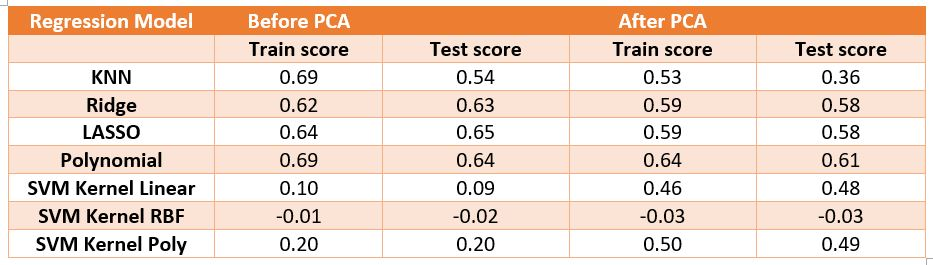

## Observations after Model Comparison:
- As expected, the regression models ran much faster after PCA as compared to the amount of time each model took to run before applying PCA during Project 1. This suggests that PCA served the purpose of Dimensionality Reduction well.
- Also, just like during Project 1, Polynomial regressor is still our best model after PCA with the Train and Test scores of 0.64 and 0.61 respectively.
- In conclusion, applying PCA resulted in a trade-off between the time taken to run the models and the scores of each models run, as we see that the scores after PCA have been minutely affected.

# Deep Neural Network:

In [132]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [133]:
import keras

In [134]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(10, input_dim = 15, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'mse' , optimizer = 'adam', metrics = ['mse'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 10, batch_size = 400)

Epoch 1/10
3254/3254 [==============================] - 0s 25us/sample - loss: 425598915599.7345 - mean_squared_error: 425598877696.0000
Epoch 2/10
3254/3254 [==============================] - 0s 4us/sample - loss: 425598893626.8470 - mean_squared_error: 425598877696.0000
Epoch 3/10
3254/3254 [==============================] - 0s 4us/sample - loss: 425598848029.5808 - mean_squared_error: 425598877696.0000
Epoch 4/10
3254/3254 [==============================] - 0s 4us/sample - loss: 425598832179.2944 - mean_squared_error: 425598877696.0000
Epoch 5/10
3254/3254 [==============================] - 0s 5us/sample - loss: 425598807930.5716 - mean_squared_error: 425598812160.0000
Epoch 6/10
3254/3254 [==============================] - 0s 6us/sample - loss: 425598750531.1862 - mean_squared_error: 425598779392.0000
Epoch 7/10
3254/3254 [==============================] - 0s 6us/sample - loss: 425598722979.4813 - mean_squared_error: 425598713856.0000
Epoch 8/10
3254/3254 [=========================

In [135]:
model1.evaluate(X_train, y_train)

3254/3254 [==============================] - 0s 27us/sample - loss: 425598606871.6017 - mean_squared_error: 425598681088.0000


[425598606871.60175, 425598680000.0]

In [136]:
model1.evaluate(X_test, y_test)

814/814 [==============================] - 0s 26us/sample - loss: 435923415996.0688 - mean_squared_error: 435923386368.0000


[435923415996.0688, 435923400000.0]